<a href="https://colab.research.google.com/github/kaapivalli/Machine-Learning/blob/main/Market_basket_analysis_Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSTALLING & IMPORTING NECESSARY LIBRARIES

In [ ]:
!pip install apyori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5974 sha256=0700e5fb5e58aa153a5dbb0b3811ec6694bb88419cf10fe9e46ea6bda27637d5
  Stored in directory: /root/.cache/pip/wheels/cb/f6/e1/57973c631d27efd1a2f375bd6a83b2a616c4021f24aab84080
Successfully built apyori


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#import warnings
#warnings.filterwarnings(filter='ignore')

In [ ]:
from apyori import apriori

# READING CSV INTO DATAFRAME 

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/amankharwal/Website-data/master/Groceries_dataset.csv')

# CHECKING THE CHARACTERISTICS OF DATA

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [ ]:
df.isna().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [ ]:
df.shape

(38765, 3)

In [ ]:
df.describe()

,Member_number
count,38765.000000
mean,3003.641868
std,1153.611031
min,1000.000000
25%,2002.000000
50%,3005.000000
75%,4007.000000
max,5000.000000


In [ ]:
df

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk
...,...,...,...
38760,4471,08-10-2014,sliced cheese
38761,2022,23-02-2014,candy
38762,1097,16-04-2014,cake bar
38763,1510,03-12-2014,fruit/vegetable juice


# DATA PREPARATION

In [ ]:
df['Date']=pd.to_datetime(df['Date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [ ]:
df.rename(columns={'itemDescription':'itmdesc'},inplace=True)

In [ ]:
df['itmdesc'].value_counts().head(10)

whole milk          2502
other vegetables    1898
rolls/buns          1716
soda                1514
yogurt              1334
root vegetables     1071
tropical fruit      1032
bottled water        933
sausage              924
citrus fruit         812
Name: itmdesc, dtype: int64

In [ ]:
df['itmdesc'].unique().size

167

# EDA

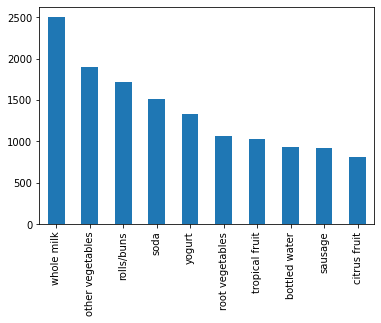

In [ ]:
df['itmdesc'].value_counts().head(10).plot.bar()

In [ ]:
df['itmdesc'].value_counts().tail(10)

whisky                   8
salad dressing           6
make up remover          5
toilet cleaner           5
frozen chicken           5
rubbing alcohol          5
bags                     4
baby cosmetics           3
kitchen utensil          1
preservation products    1
Name: itmdesc, dtype: int64

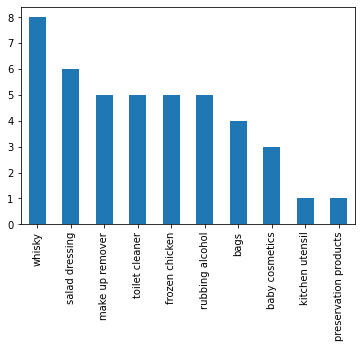

In [ ]:
df['itmdesc'].value_counts().tail(10).plot.bar()

In [ ]:
df.columns

Index(['Member_number', 'Date', 'itmdesc'], dtype='object')

In [ ]:
df.Member_number.value_counts().head(10)
#frequently visiting customers

3180    36
3737    33
3050    33
2051    33
2625    31
3915    31
2433    31
2271    31
3872    30
3289    29
Name: Member_number, dtype: int64

# CREATING USEFUL FEATURES FROM EXISTING FEATURES

In [ ]:
df['year']=pd.DatetimeIndex(df['Date']).year
df['month']=pd.DatetimeIndex(df['Date']).month
df['day']=pd.DatetimeIndex(df['Date']).day

In [ ]:
df

,Member_number,Date,itmdesc,year,month,day
0,1808,2015-07-21,tropical fruit,2015,7,21
1,2552,2015-05-01,whole milk,2015,5,1
2,2300,2015-09-19,pip fruit,2015,9,19
3,1187,2015-12-12,other vegetables,2015,12,12
4,3037,2015-01-02,whole milk,2015,1,2
...,...,...,...,...,...,...
38760,4471,2014-08-10,sliced cheese,2014,8,10
38761,2022,2014-02-23,candy,2014,2,23
38762,1097,2014-04-16,cake bar,2014,4,16
38763,1510,2014-03-12,fruit/vegetable juice,2014,3,12


In [ ]:
df.year.value_counts()

2015    20488
2014    18277
Name: year, dtype: int64

In [ ]:
df.month.value_counts()

8     3498
5     3335
1     3333
6     3316
3     3283
11    3273
7     3268
10    3218
4     3172
12    3074
2     3032
9     2963
Name: month, dtype: int64

In [ ]:
df.day.value_counts()

28    1375
21    1354
26    1351
8     1349
14    1341
13    1341
27    1327
4     1308
10    1308
11    1297
5     1290
24    1290
18    1285
7     1277
23    1277
22    1272
19    1272
9     1271
2     1252
1     1250
15    1245
3     1243
6     1232
25    1229
20    1214
30    1201
17    1181
12    1179
16    1158
29    1124
31     672
Name: day, dtype: int64

# ANALYSING BASED ON NEWLY CREATED FEATURES

In [ ]:
df.groupby(['year'])['month'].value_counts()

year  month
2014  5        1625
      7        1623
      10       1555
      2        1547
      8        1535
      6        1525
      12       1520
      4        1506
      1        1504
      11       1496
      3        1491
      9        1350
2015  8        1963
      1        1829
      3        1792
      6        1791
      11       1777
      5        1710
      4        1666
      10       1663
      7        1645
      9        1613
      12       1554
      2        1485
Name: month, dtype: int64

In [ ]:
df['day'][df['year']==2014].value_counts()

13    685
9     662
6     649
26    648
14    630
28    626
8     622
4     622
22    619
24    613
27    610
10    607
1     606
21    603
25    601
7     597
20    594
30    592
11    590
5     588
17    587
19    586
2     571
16    570
23    569
18    569
12    558
3     556
15    532
29    469
31    346
Name: day, dtype: int64

# ONE HOT ENCODING & CREATING NEW DATAFRAME FROM MANIPULATED OLD DATAFRAMES

In [ ]:
df1=df.copy()

In [ ]:
df.columns

Index(['Member_number', 'Date', 'itmdesc', 'year', 'month', 'day'], dtype='object')

In [ ]:
df1=pd.get_dummies(df['itmdesc'])

In [ ]:
df1

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df2=df.copy()

In [ ]:
df2.drop(['itmdesc'],axis=1,inplace=True)

In [ ]:
df2=df2.join(df1)

In [ ]:
df2

,Member_number,Date,year,month,day,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,1808,2015-07-21,2015,7,21,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2552,2015-05-01,2015,5,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,2300,2015-09-19,2015,9,19,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1187,2015-12-12,2015,12,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,3037,2015-01-02,2015,1,2,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38760,4471,2014-08-10,2014,8,10,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38761,2022,2014-02-23,2014,2,23,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38762,1097,2014-04-16,2014,4,16,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38763,1510,2014-03-12,2014,3,12,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df.groupby(['Member_number'])['itmdesc'].count().sort_values(ascending=False)

Member_number
3180    36
3737    33
3050    33
2051    33
3915    31
        ..
3533     2
2302     2
4824     2
1084     2
3377     2
Name: itmdesc, Length: 3898, dtype: int64

In [ ]:
df[df['Member_number']==3180]['itmdesc']

421            whole milk
1810       tropical fruit
2054                  ham
4041      root vegetables
4482         bottled beer
5052               pastry
5467              sausage
7684     other vegetables
8034       tropical fruit
10056        citrus fruit
13853          whole milk
13973              yogurt
14533    other vegetables
16091          rolls/buns
16570               sugar
17959            zwieback
18203               sugar
20190      condensed milk
20631       domestic eggs
21201      tropical fruit
21616           margarine
23833                curd
24183       baking powder
26205       domestic eggs
30002               flour
30122          whole milk
30682          rolls/buns
32240    bathroom cleaner
33983          whole milk
34103              onions
35802              pastry
36030             waffles
36236         canned beer
36651          newspapers
37300           margarine
37420               sugar
Name: itmdesc, dtype: object

# GETTING THE LIST OF PRODUCTS IN THE STORE

In [ ]:
prods=df['itmdesc'].unique()

In [ ]:
prods

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

# PREPARING DATAFRAME BY PERFORMING GROUPBY
- finding total no of item(x) brought on Date(y) by member_no(z)

In [ ]:
df3=df2.groupby(['Member_number','Date'])[prods[:]].sum()

In [ ]:
df3

tropical fruit  whole milk  pip fruit  \
Member_number Date                                                
1000          2014-06-24               0           1          0   
              2015-03-15               0           1          0   
              2015-05-27               0           0          0   
              2015-07-24               0           0          0   
              2015-11-25               0           0          0   
...                                  ...         ...        ...   
4999          2015-05-16               0           0          0   
              2015-12-26               0           0          0   
5000          2014-09-03               0           0          0   
              2014-11-16               0           0          0   
              2015-10-02               0           0          0   

                          other vegetables  rolls/buns  pot plants  \
Member_number Date                                                   
1000          2014-06-24                 0           0           0   
              2015-03-15                 0           0           0   
              2015-05-27                 0           0           0   
              2015-07-24                 0           0           0   
              2015-11-25                 0           0           0   
...                                    ...         ...         ...   
4999          2015-05-16                 0           0           0   
              2015-12-26                 0           0           0   
5000          2014-09-03                 0           0           0   
              2014-11-16                 1           0           0   
              2015-10-02                 0           0           0   

                          citrus fruit  beef  frankfurter  chicken  ...  \
Member_number Date                                                  ...   
1000          2014-06-24             0     0            0        0  ...   
              2015-03-15             0     0            0        0  ...   
              2015-05-27             0     0            0        0  ...   
              2015-07-24             0     0            0        0  ...   
              2015-11-25             0     0            0        0  ...   
...                                ...   ...          ...      ...  ...   
4999          2015-05-16             0     0            0        0  ...   
              2015-12-26             0     0            0        0  ...   
5000          2014-09-03             0     0            0        0  ...   
              2014-11-16             0     0            0        0  ...   
              2015-10-02             0     0            0        0  ...   

                          flower (seeds)  rice  tea  salad dressing  \
Member_number Date                                                    
1000          2014-06-24               0     0    0               0   
              2015-03-15               0     0    0               0   
              2015-05-27               0     0    0               0   
              2015-07-24               0     0    0               0   
              2015-11-25               0     0    0               0   
...                                  ...   ...  ...             ...   
4999          2015-05-16               0     0    0               0   
              2015-12-26               0     0    0               0   
5000          2014-09-03               0     0    0               0   
              2014-11-16               0     0    0               0   
              2015-10-02               0     0    0               0   

                          specialty vegetables  pudding powder  ready soups  \
Member_number Date                                                            
1000          2014-06-24                     0               0            0   
              2015-03-15                     0               0            0   
              2015-05-27   

In [ ]:
df3=df3.reset_index()[prods]

In [ ]:
df3

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#df3=bckup.copy()

- replacing all numbers > 0 (i.e.)where at least one of item(x) has been bought with the name of item(x)

In [ ]:
for i in prods:
    df3[i]=df3[i].apply(lambda x:i if x>0 else x)

*It can also be done like:*<br>``` for i in df3.columns:```<br>
&nbsp;&nbsp;&nbsp;&nbsp;``` df3[i].replace(1,i,inplace=True) ```
could also be done like this

In [ ]:
df3.tail(10)

,tropical fruit,whole milk,pip fruit,other vegetables,rolls/buns,pot plants,citrus fruit,beef,frankfurter,chicken,...,flower (seeds),rice,tea,salad dressing,specialty vegetables,pudding powder,ready soups,make up remover,toilet cleaner,preservation products
14953,0,0,0,0,rolls/buns,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14954,0,0,0,other vegetables,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14956,tropical fruit,0,0,other vegetables,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14961,0,0,0,other vegetables,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
14962,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# EXTRACTING THE VALUES AS AN ARRAY

In [ ]:
new_data=df3.values

In [ ]:
new_data

array([[0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 'whole milk', 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=object)

In [ ]:
new_data=[i[i!=0].tolist() for i in new_data if i[i!=0].tolist()]

In [ ]:
new_data

[['whole milk', 'pastry', 'salty snack'],
 ['whole milk', 'yogurt', 'sausage', 'semi-finished bread'],
 ['soda', 'pickled vegetables'],
 ['canned beer', 'misc. beverages'],
 ['sausage', 'hygiene articles'],
 ['whole milk', 'rolls/buns', 'sausage'],
 ['whole milk', 'soda'],
 ['frankfurter', 'soda', 'whipped/sour cream'],
 ['frankfurter', 'curd'],
 ['beef', 'white bread'],
 ['whole milk', 'butter'],
 ['other vegetables', 'frozen vegetables'],
 ['tropical fruit', 'sugar'],
 ['butter milk', 'specialty chocolate'],
 ['frozen meals', 'dental care'],
 ['rolls/buns'],
 ['root vegetables', 'detergent'],
 ['rolls/buns', 'sausage'],
 ['dish cleaner', 'cling film/bags'],
 ['canned beer', 'frozen fish'],
 ['tropical fruit', 'whole milk', 'pip fruit'],
 ['whole milk', 'root vegetables', 'pastry'],
 ['rolls/buns', 'chocolate', 'red/blush wine'],
 ['other vegetables', 'shopping bags'],
 ['whole milk', 'rolls/buns', 'packaged fruit/vegetables', 'chocolate'],
 ['other vegetables', 'hygiene articles'],
 

# IMPLEMENTING APRIORI ALGORITHM

In [ ]:
# APRIORI IMPLE
association=apriori(new_data,min_support=0.0003,min_confidence=0.05,max_length=3,min_lift=3)
result=list(association)
result

[RelationRecord(items=frozenset({'liver loaf', 'fruit/vegetable juice'}), support=0.00040098910646260775, ordered_statistics=[OrderedStatistic(items_base=frozenset({'liver loaf'}), items_add=frozenset({'fruit/vegetable juice'}), confidence=0.12, lift=3.5276227897838903)]),
 RelationRecord(items=frozenset({'pickled vegetables', 'ham'}), support=0.0005346521419501437, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pickled vegetables'}), items_add=frozenset({'ham'}), confidence=0.05970149253731344, lift=3.4895055970149254)]),
 RelationRecord(items=frozenset({'meat', 'roll products '}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'roll products '}), items_add=frozenset({'meat'}), confidence=0.06097560975609757, lift=3.620547812620984)]),
 RelationRecord(items=frozenset({'salt', 'misc. beverages'}), support=0.0003341575887188398, ordered_statistics=[OrderedStatistic(items_base=frozenset({'salt'}), items_add=frozenset({'misc. beverag

**WAY TO INFER ABOVE RESULT:**<br>
- `items_base` from above means 'items put in the cart by the customers' &
- `items_add` refers to 'items that can be recommended to be bought along with items in the cart'

# CONCLUSION:
Thus Market-Basket analysis has been performed successfully using Apriori Algorithm